**Data Cleaning Process - Bank Client Attributes and Marketing Outcomes**

The **Bank Client Attributes and Marketing Outcomes** dataset offers a comprehensive insight into the attributes of bank clients and the outcomes of marketing campaigns. It includes details such as client demographics, employment status, financial history, and contact methods. Additionally, the dataset encompasses the results of marketing campaigns, including the duration, success rates, and previous interactions with clients. This dataset serves as a valuable resource for analyzing customer behavior, optimizing marketing strategies, and enhancing client engagement in the banking sector.

In our dataset we can find:

* 18 columns 
* 45211 rows

Each row represents a person that has been contacted by a marketing company. Each person has 16 features associated to their personal information and 1 categorical if the person is interested in adquiring the producty. 

The 17 columns are:
1. ID (numeric)
2. Age (numeric)
3. Job ( "admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
4. Marital ("single", "married", "divorced")
5. Education ("unknown", "secondary", "primary", "tertiary")
6. Default (If left to pay its obligation: "yes", "no")
7. Balance (Last Years' Income-Outcome: numeric)
8. Housing (Do you have a mortgage credit?: "yes", "no")
9. Loan (Do you have a loans?: "yes", "no")
10. Contact ("unknown", "telephone", "cellular")
11. Day (The last day that the person was contacted: numeric)
12. Month (The last month that the person was contacted: numeric)
13. Duration (Duration (in seconds) of the last contact: numeric)
14. Campaign (Total number of times the person was contacted during the campaign: numeric)
15. Pdays (Number of days elapsed after the person was contacted before the actual campaign: -1: not contacted before)
16. Previous (Number of times that the person had being contacted before this campaign: numeric)
17. Poutcome (Result of the marketing campaign: "unknown", "other", "failure", "success")
18. Y (Did the client subscribe to the product?: "yes", "no")

**Data Set Introduction**

Por alguma razão para instalar o from imblearn.over_sampling import SMOTE é preciso passar a versão do sklearn para uma abaixo do 1.3 (por exemplo o 1.2.2)

In [223]:
import sklearn
print(sklearn.__version__)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier as DTC
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.inspection import permutation_importance

1.2.2


In [224]:
path = 'Assignment-2_Data.csv'
data = pd.read_csv(path)

In [225]:
print(data.shape) 
data.head()

(45211, 18)


,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


**Data Set Clean Up**

After checking our dataset, we have to check for some occurences:

1. Missing data in some rows/columns
2. Irrelevant columns to our problem
3. Repeated rows
4. Outlier Values. We need to analize them in detail to know what to do with them.
5. Typos in inserts

**Treating Missing Data**

First of all, let's start by checking if we have some "NaN" values in out data set.

In [227]:
check_nan_in_data = data.isnull().values.any()
print(check_nan_in_data)

True


As we can see, we have "NaN" values inside our dataset, so we must identify them!

In [228]:
#Counting Nan values

count_nan_values_in_data = data.isnull().sum().sum()
print(count_nan_values_in_data)

16


In [229]:
#Counting NaN values by column

data.isnull().sum()

Id            0
age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

It makes sense to eliminate all rows that have NaN values, in at least one column.

In [230]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45197 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45197 non-null  int64  
 1   age        45197 non-null  float64
 2   job        45197 non-null  object 
 3   marital    45197 non-null  object 
 4   education  45197 non-null  object 
 5   default    45197 non-null  object 
 6   balance    45197 non-null  float64
 7   housing    45197 non-null  object 
 8   loan       45197 non-null  object 
 9   contact    45197 non-null  object 
 10  day        45197 non-null  int64  
 11  month      45197 non-null  object 
 12  duration   45197 non-null  int64  
 13  campaign   45197 non-null  int64  
 14  pdays      45197 non-null  int64  
 15  previous   45197 non-null  int64  
 16  poutcome   45197 non-null  object 
 17  y          45197 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


As we can see, we now have 45197 rows to analyse.

**Treating irrelevant columns**

We are considering a column to be irrelevant when:

- A column doesn't have any relevant information to solve this problem. 
- A categorical columns with only one level of classification.
- A numerical columns with only one value.

In our case, we will be removing the `Id` column only.

In [231]:
data = data.drop(['Id'], axis='columns')

In [232]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in cols_cat:
    print(f'Column {col}: {data[col].nunique()} sublevels')

Column job: 12 sublevels
Column marital: 3 sublevels
Column education: 4 sublevels
Column default: 2 sublevels
Column housing: 2 sublevels
Column loan: 2 sublevels
Column contact: 3 sublevels
Column month: 12 sublevels
Column poutcome: 4 sublevels
Column y: 2 sublevels


As we can see, all categorical columns have more than one level.

Let's check the numerical columns:

In [233]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000
mean,40.933204,1362.608027,15.809766,258.147974,2.764387,40.210589,0.580503
std,10.623076,3045.162034,8.321591,257.444942,3.098345,100.141627,2.303775
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As we can check in the table above, all standard deviation rows ("std") are all different than zero. That means that all columns have, at least, two different values.

**Checking repeated rows**

In [234]:
print(f'Size of the set before eliminating the repeated rows: {data.shape}')
data.drop_duplicates(inplace=True)

print(f'Size of the set after eliminating the repeated rows: {data.shape}')

Size of the set before eliminating the repeated rows: (45197, 17)
Size of the set after eliminating the repeated rows: (45197, 17)


As we can see, we don't have any repeated rows in out dataset.

**Checking for outlying numerical variables**


Let's create "boxplots" to all numerical columns:

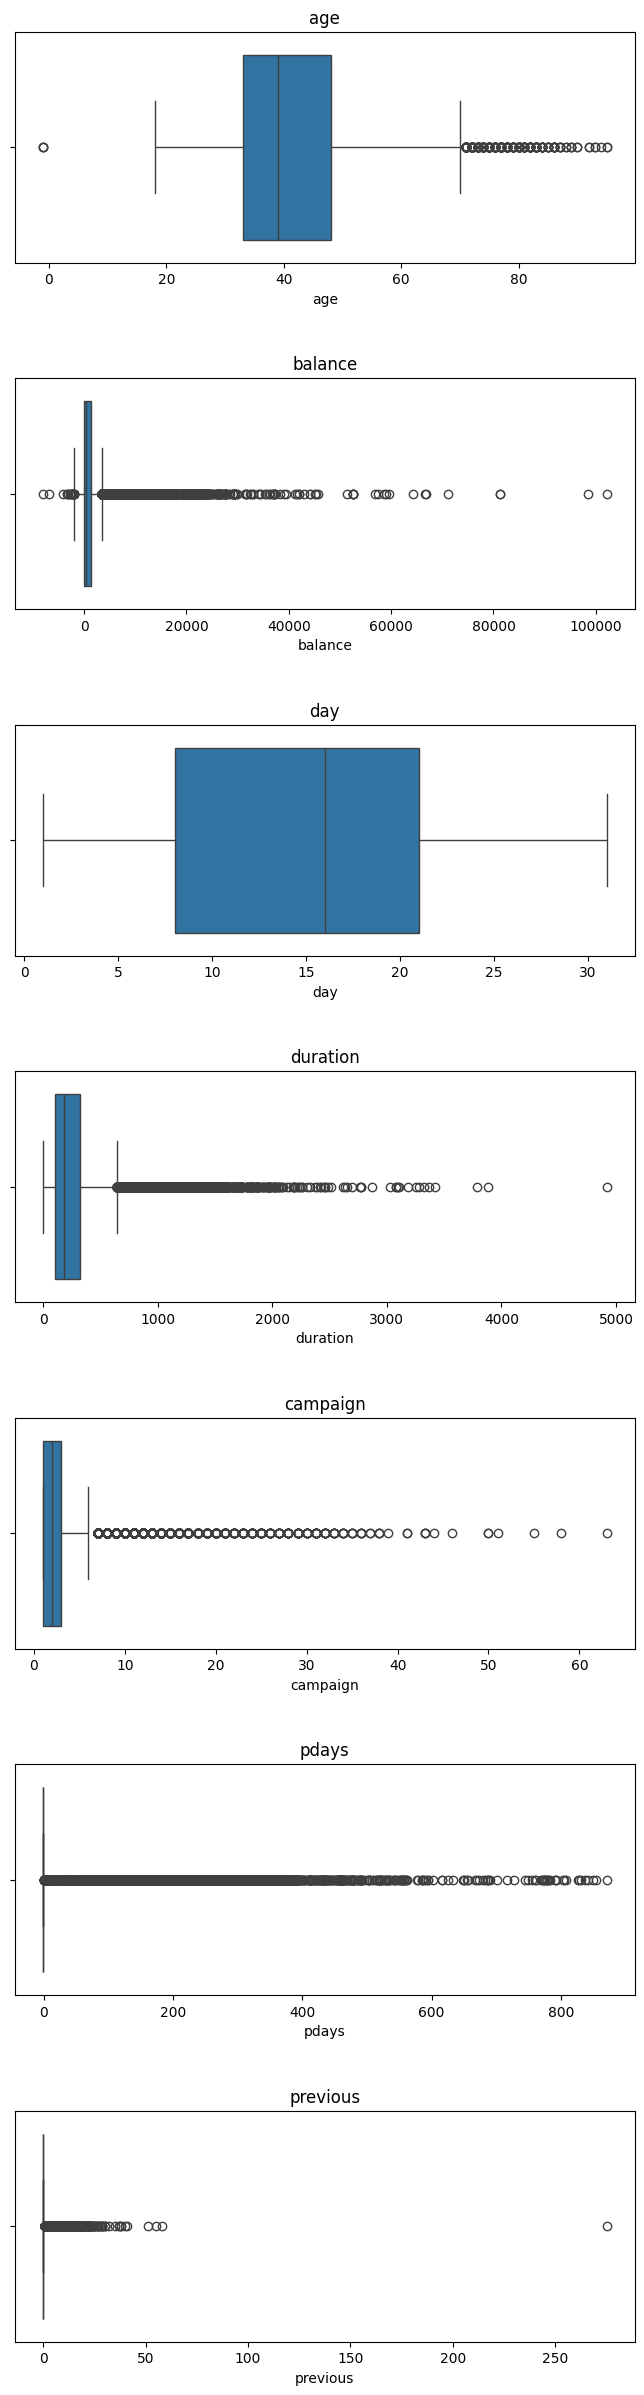

In [235]:
cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i]) # "boxplot" can allow us to see the outliers points
    ax[i].set_title(col)

**Observations:**

- 'previous': we have one extreme value in our dataset (close to 300).
- 'age': we are only considering people older than 18 years old.

In [236]:
print(f'Size of the dataset before eliminate the rows of previous: {data.shape}')
data = data[data['previous']<=100]
data = data[data['age']>=18] 
print(f'Size of the dataset after eliminate the rows of previous: {data.shape}')

Size of the dataset before eliminate the rows of previous: (45197, 17)
Size of the dataset after eliminate the rows of previous: (45193, 17)


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 3 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45193 non-null  float64
 1   job        45193 non-null  object 
 2   marital    45193 non-null  object 
 3   education  45193 non-null  object 
 4   default    45193 non-null  object 
 5   balance    45193 non-null  float64
 6   housing    45193 non-null  object 
 7   loan       45193 non-null  object 
 8   contact    45193 non-null  object 
 9   day        45193 non-null  int64  
 10  month      45193 non-null  object 
 11  duration   45193 non-null  int64  
 12  campaign   45193 non-null  int64  
 13  pdays      45193 non-null  int64  
 14  previous   45193 non-null  int64  
 15  poutcome   45193 non-null  object 
 16  y          45193 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 6.2+ MB


**Checking for typos of the categorical variables**


Let's check if we have typos in our categorical columns.

In [238]:
encoder = LabelEncoder()

data['job'] = encoder.fit_transform(data['job'])
data['marital'] = encoder.fit_transform(data['marital'])
data['education'] = encoder.fit_transform(data['education'])
data['default'] = encoder.fit_transform(data['default'])
data['housing'] = encoder.fit_transform(data['housing'])
data['loan'] = encoder.fit_transform(data['loan'])
data['contact'] = encoder.fit_transform(data['contact'])
data['month'] = encoder.fit_transform(data['month'])
data['poutcome'] = encoder.fit_transform(data['poutcome'])
data['y'] = encoder.fit_transform(data['y'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47.0,1,1,3,0,1506.0,1,0,2,5,8,92,1,-1,0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5,8,198,1,-1,0,3,0
5,35.0,4,1,2,0,231.0,1,0,2,5,8,139,1,-1,0,3,0
6,28.0,4,2,2,0,447.0,1,1,2,5,8,217,1,-1,0,3,0
10,41.0,0,0,1,0,270.0,1,0,2,5,8,222,1,-1,0,3,0


C:\Users\danie\AppData\Local\Temp\ipykernel_11520\2429897199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[i], data = data, palette = 'Set2',hue_order=None)
C:\Users\danie\AppData\Local\Temp\ipykernel_11520\2429897199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[i], data = data, palette = 'Set2',hue_order=None)
C:\Users\danie\AppData\Local\Temp\ipykernel_11520\2429897199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[i], data = data, palette = 'Set2',hue_order=None)
C:\Users\danie\AppData\Local\Te

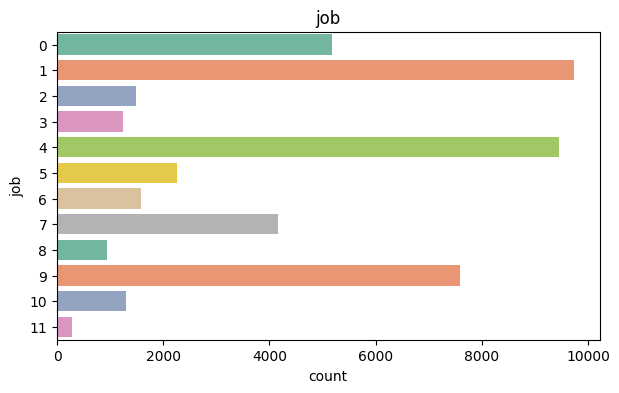

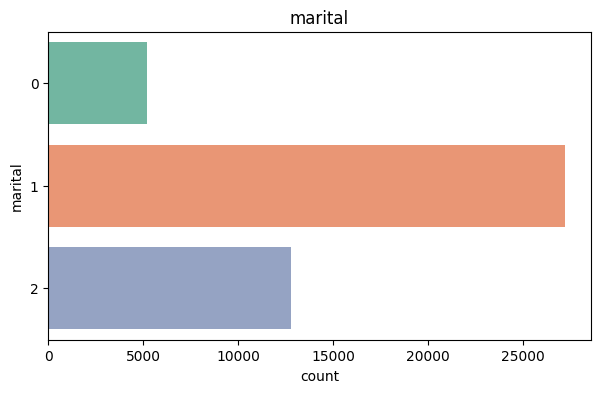

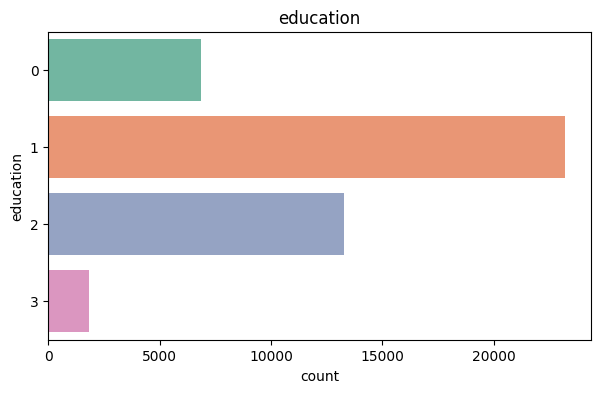

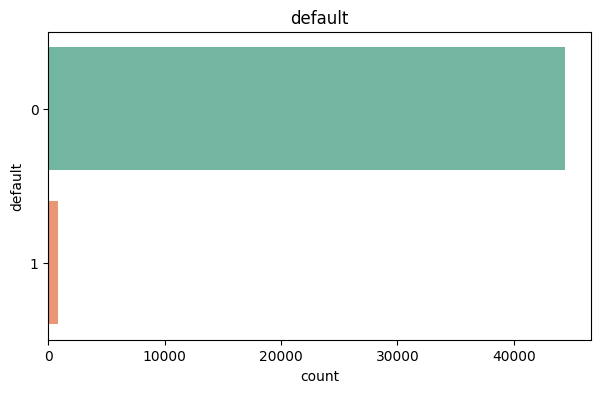

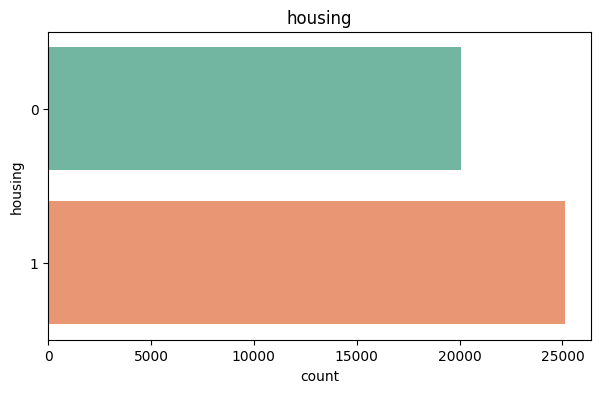

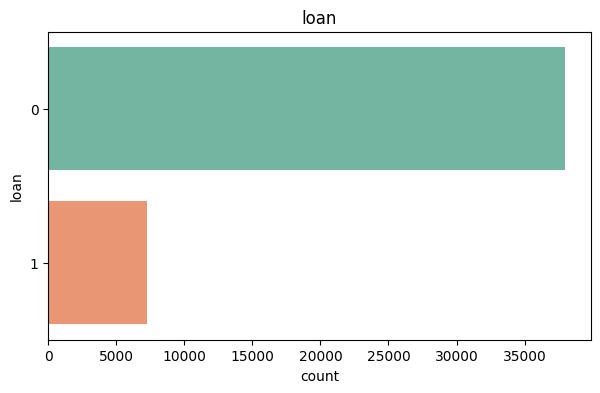

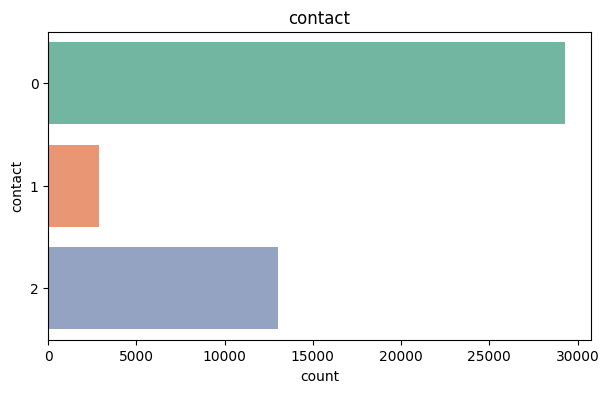

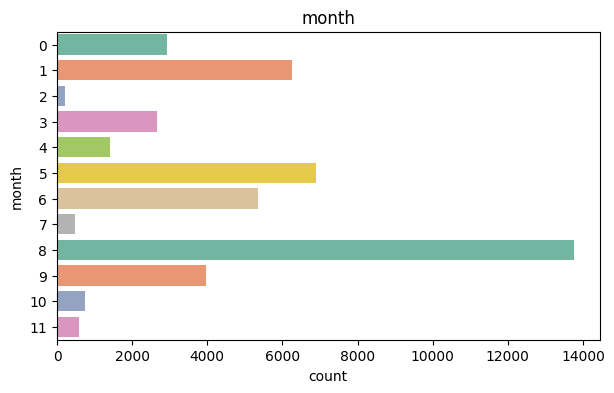

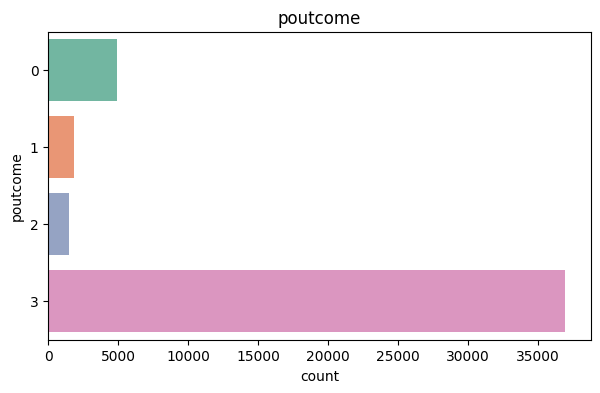

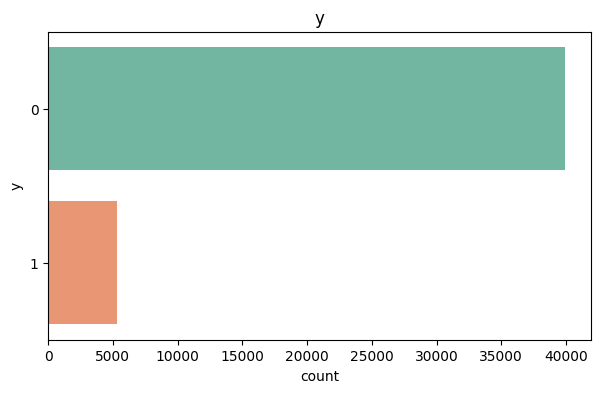

In [239]:
col_of_data = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for i in col_of_data:
    plt.figure(figsize=(7,4))
    plt.title(i)
    sns.countplot(y=data[i], data = data, palette = 'Set2',hue_order=None)

We don't have any typos in our categorical columns!

In [240]:
data.shape

(45193, 17)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 3 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45193 non-null  float64
 1   job        45193 non-null  int32  
 2   marital    45193 non-null  int32  
 3   education  45193 non-null  int32  
 4   default    45193 non-null  int32  
 5   balance    45193 non-null  float64
 6   housing    45193 non-null  int32  
 7   loan       45193 non-null  int32  
 8   contact    45193 non-null  int32  
 9   day        45193 non-null  int64  
 10  month      45193 non-null  int32  
 11  duration   45193 non-null  int64  
 12  campaign   45193 non-null  int64  
 13  pdays      45193 non-null  int64  
 14  previous   45193 non-null  int64  
 15  poutcome   45193 non-null  int32  
 16  y          45193 non-null  int32  
dtypes: float64(2), int32(10), int64(5)
memory usage: 4.5 MB


We conclued that the dataset has been cleaned up and ready to be explored in our project.

In [242]:
path_clean_dataset = 'data_clean.csv'
data.to_csv(path_clean_dataset, index=False)

### Model Training

First, since the dataset is not balanced, we need to over sample it to make sure there are the same number of "yes" and "no" responses to the marketing campaign so that the results obtained are valid.


In [243]:
data = pd.read_csv(path_clean_dataset)

features = data.drop(['y'], axis=1)
labels = data['y']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=30)

# Smaller test set
Xs_train, Xs_test, ys_train, ys_test = train_test_split(features, labels, test_size=0.1, random_state=30)
# Bigger test set
Xb_train, Xb_test, yb_train, yb_test = train_test_split(features, labels, test_size=0.3, random_state=30)

smote = SMOTE(random_state=30)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=30)
Xs_train_resampled, ys_train_resampled = smote.fit_resample(Xs_train, ys_train)

smote = SMOTE(random_state=30)
Xb_train_resampled, yb_train_resampled = smote.fit_resample(Xb_train, yb_train)

# Check the distribution in the resampled training set (=0.2)
print("Training set distribution after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Check the distribution in the testing set
print("\nTesting set distribution:")
print(y_test.value_counts(normalize=True))



Training set distribution after SMOTE:
y
0    0.5
1    0.5
Name: proportion, dtype: float64

Testing set distribution:
y
0    0.881403
1    0.118597
Name: proportion, dtype: float64


In [244]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import log_loss,accuracy_score, precision_score, recall_score, f1_score

#We will use KNN to demonstrate the comparison of test sizes we did for every algo
model_knn = KNeighborsClassifier(n_neighbors=5,p=1)
model_knnS = KNeighborsClassifier()
model_knnB = KNeighborsClassifier()




model_nb = GaussianNB()
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=30)
model_lr = LogisticRegression(random_state=30, max_iter=10000)
model_nn = MLPClassifier(activation='logistic', solver='adam', random_state=30)

model_rf = RandomForestClassifier(random_state=30)
model_gb = GradientBoostingClassifier(random_state=30)
model_ab = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=30)


print("don1e")



don1e


Test_size = 0.2 is the optimal as we will show later for KNN (We have tested for the rest of the algorithms too but omitted it for simplicity's sake)

In [245]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba)
    return accuracy, precision, recall, f1, loss

#Testing best num of neighbours and  best power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean) for KNN

n_neighbors_list = [3, 5, 7]
p_list = [1, 2]


results = []

for n_neighbors in n_neighbors_list:
    for p in p_list:
        model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
        model_knn.fit(X_train_resampled, y_train_resampled)
        
        accuracy, precision, recall, f1, loss = evaluate_model(model_knn, X_test, y_test)
        
        results.append({
            'n_neighbors': n_neighbors,
            'p': p,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })


for result in results:
    print(f"K-Nearest Neighbors (KNN - {result['n_neighbors']} - p={result['p']}) Performance:")
    print(f"Accuracy: {result['accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1-score: {result['f1_score']:.4f}\n")



print("We will prioritize F1-Score and the best is 5 NN and p=1")


K-Nearest Neighbors (KNN - 3 - p=1) Performance:
Accuracy: 0.7900, Precision: 0.2995, Recall: 0.5756, F1-score: 0.3940

K-Nearest Neighbors (KNN - 3 - p=2) Performance:
Accuracy: 0.7881, Precision: 0.2990, Recall: 0.5849, F1-score: 0.3957

K-Nearest Neighbors (KNN - 5 - p=1) Performance:
Accuracy: 0.7850, Precision: 0.3064, Recall: 0.6427, F1-score: 0.4149

K-Nearest Neighbors (KNN - 5 - p=2) Performance:
Accuracy: 0.7776, Precision: 0.2950, Recall: 0.6297, F1-score: 0.4018

K-Nearest Neighbors (KNN - 7 - p=1) Performance:
Accuracy: 0.7764, Precision: 0.3009, Recall: 0.6688, F1-score: 0.4151

K-Nearest Neighbors (KNN - 7 - p=2) Performance:
Accuracy: 0.7714, Precision: 0.2939, Recall: 0.6614, F1-score: 0.4070

We will prioritize F1-Score and the best is 5 NN and p=1


In [246]:
criteria = ['gini', 'entropy']

resultsDT = []


for x in criteria:
    model_dt = DecisionTreeClassifier(criterion=x, random_state=30)
    model_dt.fit(X_train_resampled, y_train_resampled)
    
    accuracy, precision, recall, f1, loss = evaluate_model(model_dt, X_test, y_test)
    
    resultsDT.append({
        'criterion': x,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })


for resultDT in resultsDT:
    print(f"Decision Tree (Criterion: {resultDT['criterion']}) Performance:")
    print(f"Accuracy: {resultDT['accuracy']:.4f}, Precision: {resultDT['precision']:.4f}, Recall: {resultDT['recall']:.4f}, F1-score: {resultDT['f1_score']:.4f}\n")
    
    print("Entropy is better")


Decision Tree (Criterion: gini) Performance:
Accuracy: 0.8513, Precision: 0.4074, Recall: 0.5578, F1-score: 0.4709

Entropy is better
Decision Tree (Criterion: entropy) Performance:
Accuracy: 0.8592, Precision: 0.4295, Recall: 0.5709, F1-score: 0.4902

Entropy is better


In [247]:
activation_functions = ['logistic', 'tanh', 'relu']
solvers = ['sgd', 'adam']

results_nn = []


for activation in activation_functions:
    for solver in solvers:
        model_nn = MLPClassifier(activation=activation, solver=solver,max_iter=15000, random_state=30)
        model_nn.fit(X_train_resampled, y_train_resampled)
        
        accuracy, precision, recall, f1, loss = evaluate_model(model_nn, X_test, y_test)
        
        results_nn.append({
            'activation': activation,
            'solver': solver,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

for result_nn in results_nn:
    print(f"Neural Network (Activation: {result_nn['activation']}, Solver: {result_nn['solver']}) Performance:")
    print(f"Accuracy: {result_nn['accuracy']:.4f}, Precision: {result_nn['precision']:.4f}, Recall: {result_nn['recall']:.4f}, F1-score: {result_nn['f1_score']:.4f}\n")
    
    print("Best is activation:logistic and solver:adam")

Neural Network (Activation: logistic, Solver: sgd) Performance:
Accuracy: 0.7552, Precision: 0.2877, Recall: 0.7211, F1-score: 0.4113

Best is activation:logistic and solver:adam
Neural Network (Activation: logistic, Solver: adam) Performance:
Accuracy: 0.8350, Precision: 0.3907, Recall: 0.6987, F1-score: 0.5012

Best is activation:logistic and solver:adam
Neural Network (Activation: tanh, Solver: sgd) Performance:
Accuracy: 0.6116, Precision: 0.2163, Recall: 0.8675, F1-score: 0.3463

Best is activation:logistic and solver:adam
Neural Network (Activation: tanh, Solver: adam) Performance:
Accuracy: 0.7921, Precision: 0.3397, Recall: 0.7976, F1-score: 0.4765

Best is activation:logistic and solver:adam
Neural Network (Activation: relu, Solver: sgd) Performance:
Accuracy: 0.6015, Precision: 0.2135, Recall: 0.8797, F1-score: 0.3437

Best is activation:logistic and solver:adam
Neural Network (Activation: relu, Solver: adam) Performance:
Accuracy: 0.7839, Precision: 0.3324, Recall: 0.8153, F

In [248]:
import time


# KNN models
start_time1 = time.time()
model_knn.fit(X_train_resampled, y_train_resampled)
end_time1 = time.time()
print(f"KNN fit time: {end_time1 - start_time1:.4f} seconds")


start_time2 = time.time()
model_knnS.fit(Xs_train_resampled, ys_train_resampled)
end_time2 = time.time()
print(f"KNN (S) fit time: {end_time2 - start_time2:.4f} seconds")


start_time3 = time.time()
model_knnB.fit(Xb_train_resampled, yb_train_resampled)
end_time3 = time.time()
print(f"KNN (B) fit time: {end_time3 - start_time3:.4f} seconds")


# Naive Bayes model
start_time4 = time.time()
model_nb.fit(X_train_resampled, y_train_resampled)
end_time4 = time.time()
print(f"Naive Bayes fit time: {end_time4 - start_time4:.4f} seconds")

# Decision Tree model
start_time5 = time.time()
model_dt.fit(X_train_resampled, y_train_resampled)
end_time5 = time.time()
print(f"Decision Tree fit time: {end_time5 - start_time5:.4f} seconds")

# Logistic Regression model
start_time6 = time.time()
model_lr.fit(X_train_resampled, y_train_resampled)
end_time6 = time.time()
print(f"Logistic Regression fit time: {end_time6 - start_time6:.4f} seconds")


# Neural Network model
start_time7 = time.time()
model_nn.fit(X_train_resampled, y_train_resampled)
end_time7 = time.time()
print(f"Neural Network fit time: {end_time7 - start_time7:.4f} seconds")


# Random Forest model
start_time8 = time.time()
model_rf.fit(X_train_resampled, y_train_resampled)
end_time8 = time.time()
print(f"Random Forest fit time: {end_time8 - start_time8:.4f} seconds")

# Gradient Boosting model
start_time9 = time.time()
model_gb.fit(X_train_resampled, y_train_resampled)
end_time9 = time.time()
print(f"Gradient Boosting fit time: {end_time9 - start_time9:.4f} seconds")

# AdaBoost model
start_time10 = time.time()
model_ab.fit(X_train_resampled, y_train_resampled)
end_time10 = time.time()
print(f"AdaBoost fit time: {end_time10 - start_time10:.4f} seconds")


KNN fit time: 0.0300 seconds
KNN (S) fit time: 0.0330 seconds
KNN (B) fit time: 0.0170 seconds
Naive Bayes fit time: 0.0450 seconds
Decision Tree fit time: 0.6550 seconds
Logistic Regression fit time: 27.7250 seconds
Neural Network fit time: 13.1767 seconds
Random Forest fit time: 15.7665 seconds
Gradient Boosting fit time: 19.4391 seconds
AdaBoost fit time: 11.8977 seconds


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.7714, Precision: 0.2939, Recall: 0.6614, F1-score: 0.4070
K-Nearest Neighbors (KNN) Performance (Smaller than Optimal Test size):
Accuracy: 0.7761, Precision: 0.2914, Recall: 0.6583, F1-score: 0.4040
K-Nearest Neighbors (KNN) Performance (Bigger than Optimal Test size):
Accuracy: 0.7747, Precision: 0.2904, Recall: 0.6290, F1-score: 0.3973

Naive Bayes (GaussianNB) Performance:
Accuracy: 0.6601, Precision: 0.2251, Recall: 0.7640, F1-score: 0.3478

Decision Tree Performance:
Accuracy: 0.8592, Precision: 0.4295, Recall: 0.5709, F1-score: 0.4902

Logistic Regression Performance:
Accuracy: 0.8197, Precision: 0.3636, Recall: 0.6940, F1-score: 0.4772

Neural Network Performance:
Accuracy: 0.7839, Precision: 0.3324, Recall: 0.8153, F1-score: 0.4723

Random Forest Performance:
Accuracy: 0.8854, Precision: 0.5136, Recall: 0.6362, F1-score: 0.5683

Gradient Boost Performance:
Accuracy: 0.8585, Precision: 0.4406, Recall: 0.7155, F1-score: 0.5453



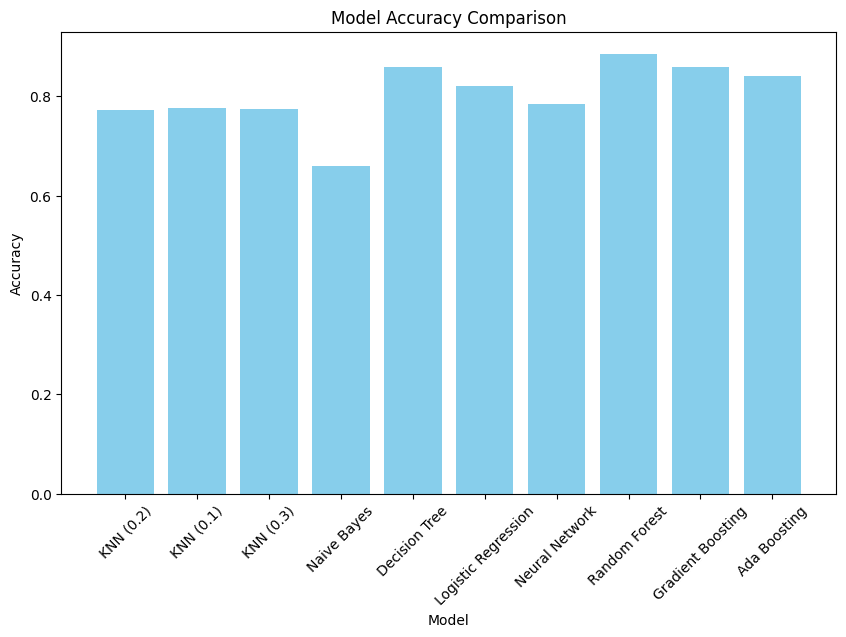

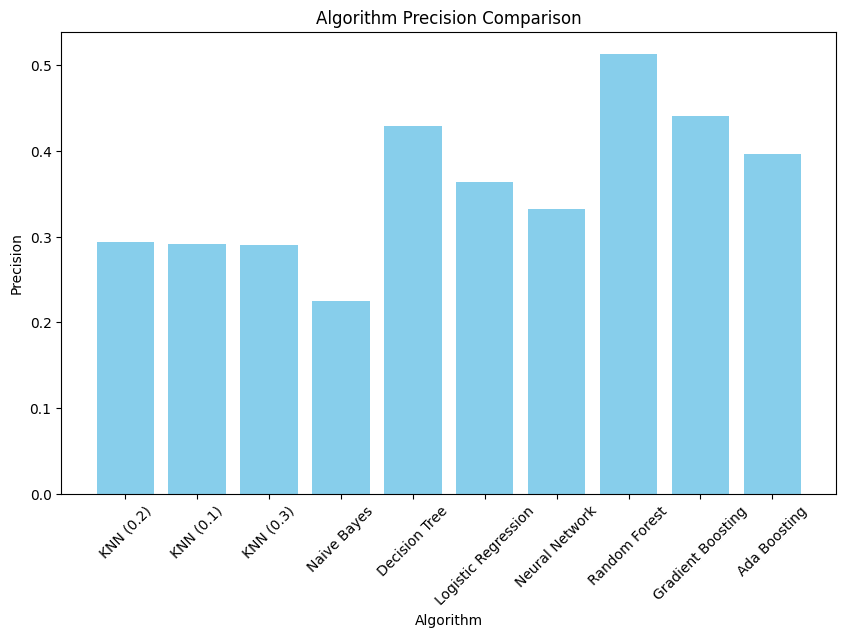

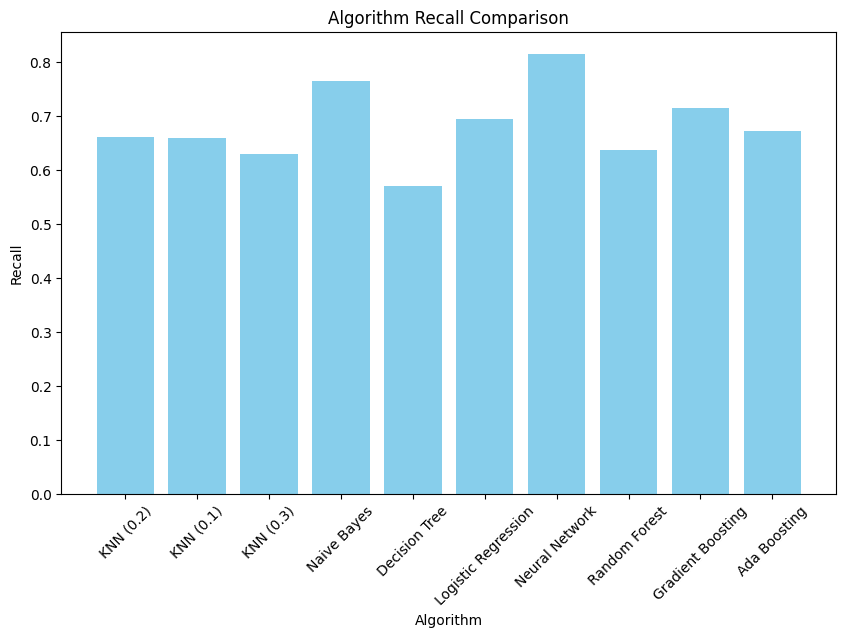

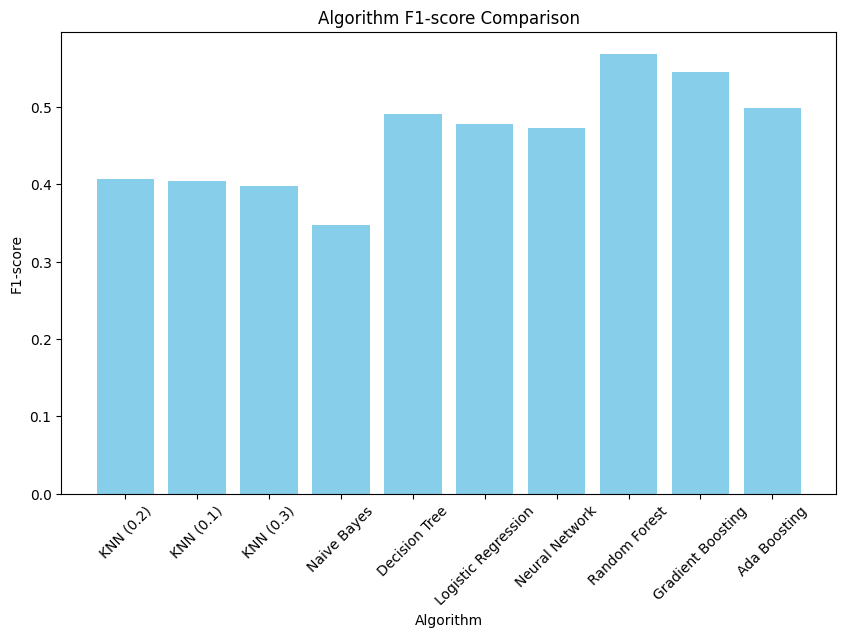

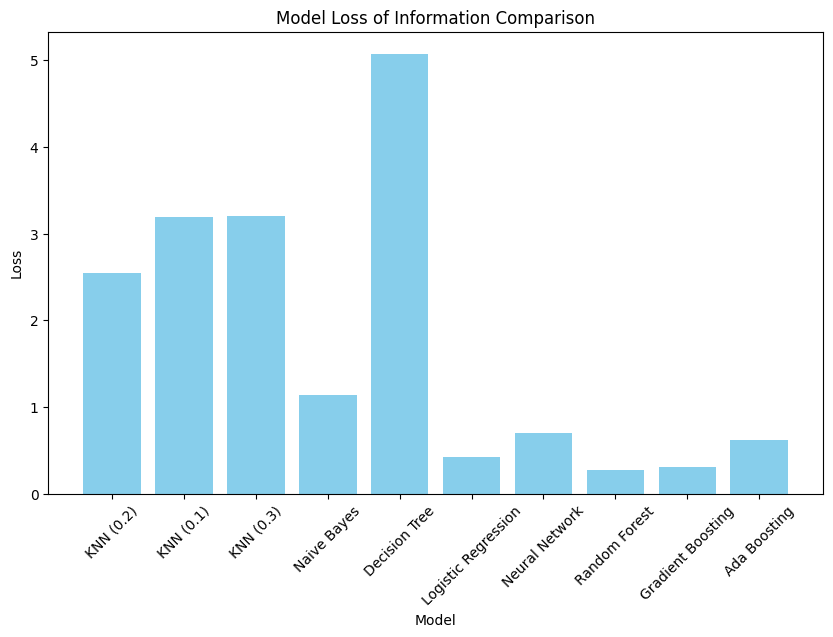

In [260]:



accuracy_knn, precision_knn, recall_knn, f1_knn, loss_knn = evaluate_model(model_knn, X_test, y_test)

accuracy_knnS, precision_knnS, recall_knnS, f1_knnS, loss_knnS = evaluate_model(model_knnS, Xs_test, ys_test)
accuracy_knnB, precision_knnB, recall_knnB, f1_knnB, loss_knnB = evaluate_model(model_knnB, Xb_test, yb_test)


accuracy_nb, precision_nb, recall_nb, f1_nb, loss_nb = evaluate_model(model_nb, X_test, y_test)

accuracy_dt, precision_dt, recall_dt, f1_dt, loss_dt = evaluate_model(model_dt, X_test, y_test)

accuracy_lr, precision_lr, recall_lr, f1_lr, loss_lr = evaluate_model(model_lr, X_test, y_test)

accuracy_nn, precision_nn, recall_nn, f1_nn, loss_nn = evaluate_model(model_nn, X_test, y_test)

accuracy_rf, precision_rf, recall_rf, f1_rf, loss_rf = evaluate_model(model_rf, X_test, y_test)

accuracy_gb, precision_gb, recall_gb, f1_gb, loss_gb = evaluate_model(model_gb, X_test, y_test)

accuracy_ab, precision_ab, recall_ab, f1_ab, loss_ab = evaluate_model(model_ab, X_test, y_test)

#Testing the best test_size
print("K-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-score: {f1_knn:.4f}")

print("K-Nearest Neighbors (KNN) Performance (Smaller than Optimal Test size):")
print(f"Accuracy: {accuracy_knnS:.4f}, Precision: {precision_knnS:.4f}, Recall: {recall_knnS:.4f}, F1-score: {f1_knnS:.4f}")


print("K-Nearest Neighbors (KNN) Performance (Bigger than Optimal Test size):")
print(f"Accuracy: {accuracy_knnB:.4f}, Precision: {precision_knnB:.4f}, Recall: {recall_knnB:.4f}, F1-score: {f1_knnB:.4f}")

#Rest of the algos are done with optimal test size (=0.2)


print("\nNaive Bayes (GaussianNB) Performance:")
print(f"Accuracy: {accuracy_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1-score: {f1_nb:.4f}")

print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}")

print("\nNeural Network Performance:")
print(f"Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1-score: {f1_nn:.4f}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")

print("\nGradient Boost Performance:")
print(f"Accuracy: {accuracy_gb:.4f}, Precision: {precision_gb:.4f}, Recall: {recall_gb:.4f}, F1-score: {f1_gb:.4f}")

print("\nAda Boost Performance:")
print(f"Accuracy: {accuracy_ab:.4f}, Precision: {precision_ab:.4f}, Recall: {recall_ab:.4f}, F1-score: {f1_ab:.4f}")



model_names = ['KNN (0.2)', 'KNN (0.1)', 'KNN (0.3)', 'Naive Bayes', 'Decision Tree', 'Logistic Regression', 'Neural Network', 'Random Forest', 'Gradient Boosting', 'Ada Boosting']

accuracies = [accuracy_knn, accuracy_knnS, accuracy_knnB, accuracy_nb, accuracy_dt, accuracy_lr, accuracy_nn, accuracy_rf, accuracy_gb, accuracy_ab]
precisions = [precision_knn, precision_knnS, precision_knnB, precision_nb, precision_dt, precision_lr, precision_nn, precision_rf, precision_gb, precision_ab]
recalls = [recall_knn, recall_knnS, recall_knnB, recall_nb, recall_dt, recall_lr, recall_nn, recall_rf, recall_gb, recall_ab]
f1_scores = [f1_knn, f1_knnS, f1_knnB, f1_nb, f1_dt, f1_lr, f1_nn, f1_rf, f1_gb, f1_ab]
losses = [loss_knn, loss_knnS, loss_knnB, loss_nb, loss_dt, loss_lr, loss_nn, loss_rf, loss_gb, loss_ab]


plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
plt.bar(x, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, model_names, rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
plt.bar(x, precisions, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Algorithm Precision Comparison')
plt.xticks(x, model_names, rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
plt.bar(x, recalls, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Algorithm Recall Comparison')
plt.xticks(x, model_names, rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
plt.bar(x, f1_scores, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('F1-score')
plt.title('Algorithm F1-score Comparison')
plt.xticks(x, model_names, rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
plt.bar(x, losses, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Model Loss of Information Comparison')
plt.xticks(x, model_names, rotation=45)
plt.show()


#### Nearest Neighbour

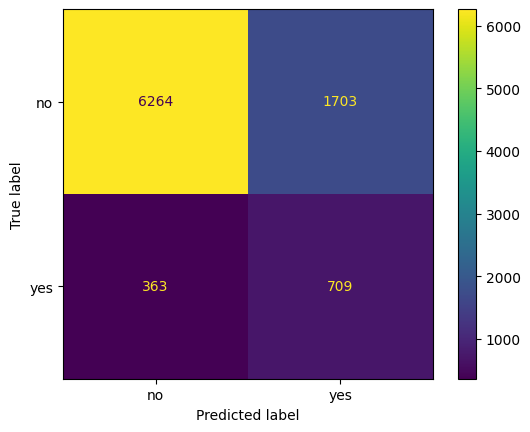

In [250]:
y_pred = model_knn.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=["no", "yes"]).plot()
plt.show()

#### Naive Bayes

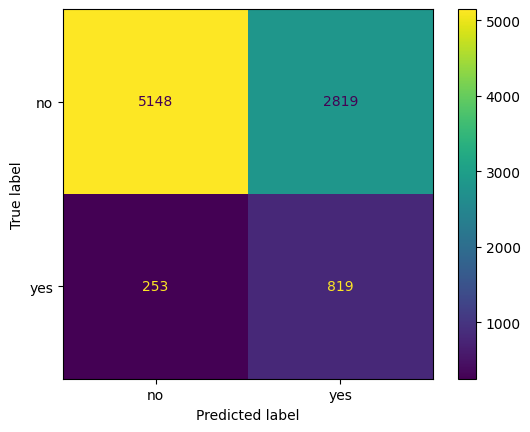

In [251]:
y_pred = model_nb.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = ["no", "yes",]).plot()
plt.show()

#### Decision Tree


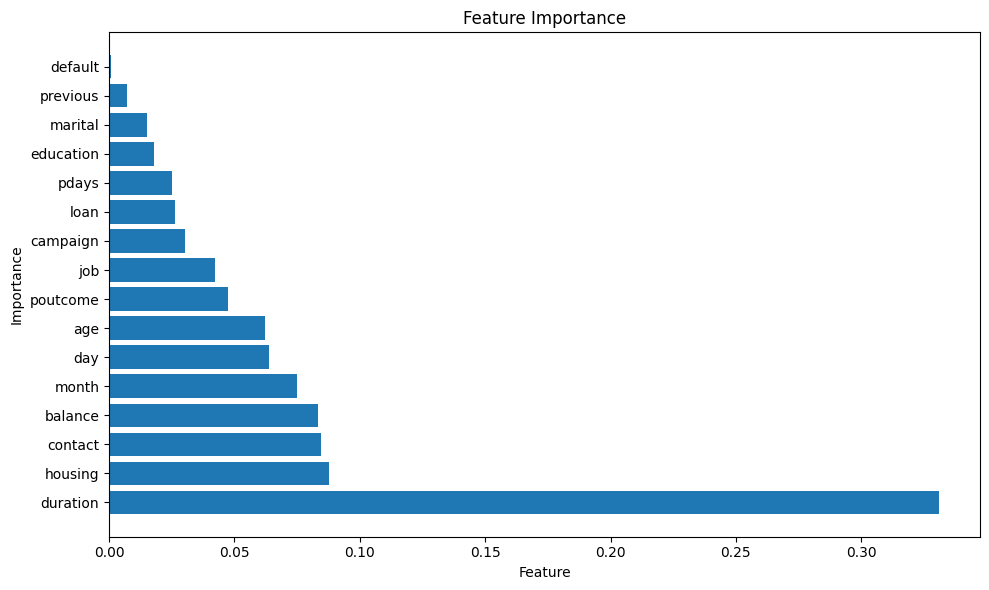

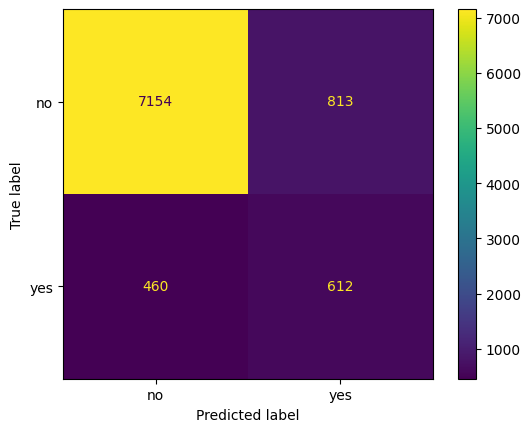

In [252]:
imp = model_dt.feature_importances_
features_names = model_dt.feature_names_in_
sorted_indices = np.argsort(imp)[::-1] 
sorted_imp = imp[sorted_indices]
sorted_features_names = [features_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features_names, sorted_imp)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

y_pred = model_dt.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = ["no", "yes",]).plot()
plt.show()

#### Logistic Regression

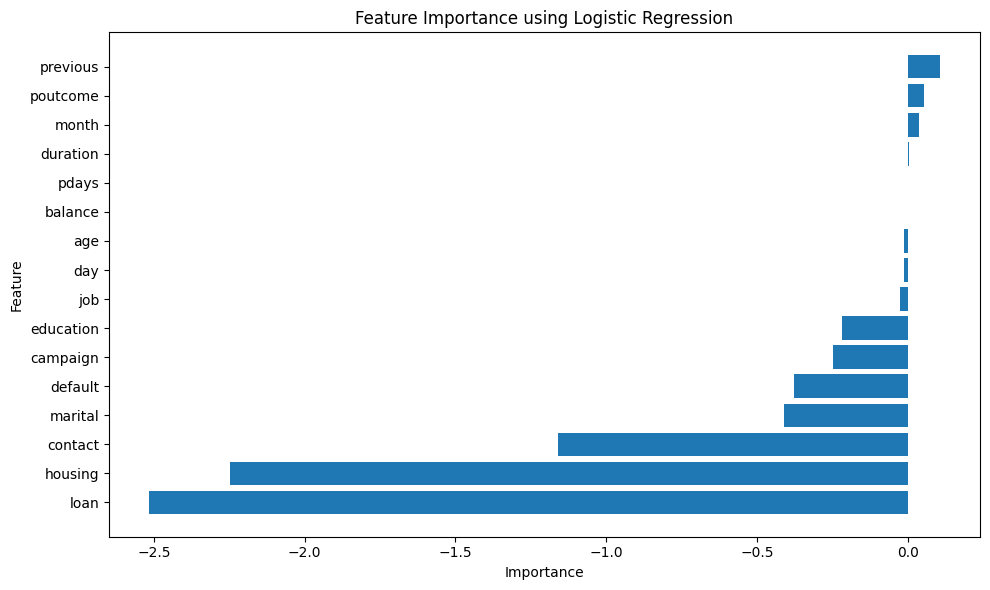

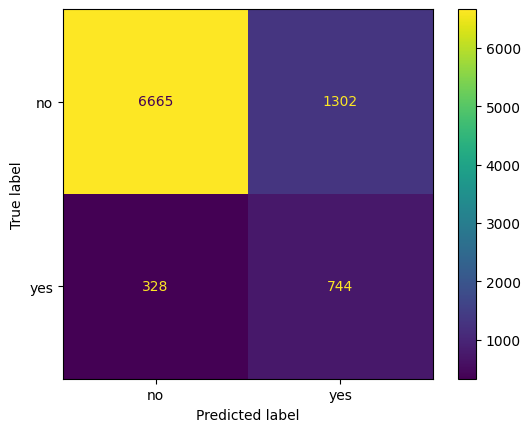

In [253]:
coefficients = model_lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Logistic Regression')
plt.tight_layout()
plt.show()
y_pred = model_lr.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = ["no", "yes",]).plot()
plt.show()

#### Neural Network

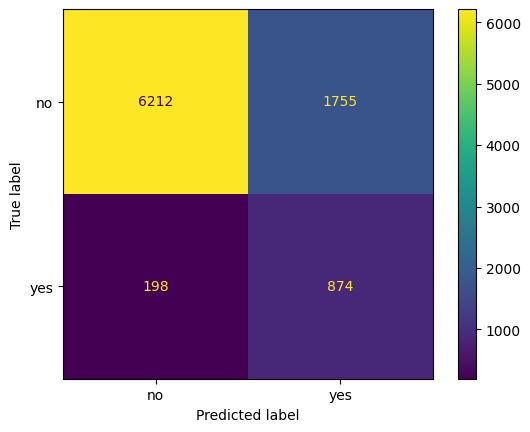

In [254]:
y_pred = model_nn.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = ["no", "yes",]).plot()
plt.show()

#### Random Forest

Feature Importance:
duration: 0.3246
housing: 0.1055
contact: 0.0801
month: 0.0712
balance: 0.0653
age: 0.0601
day: 0.0590
job: 0.0438
pdays: 0.0380
loan: 0.0363
campaign: 0.0348
poutcome: 0.0304
education: 0.0202
marital: 0.0157
previous: 0.0139
default: 0.0010


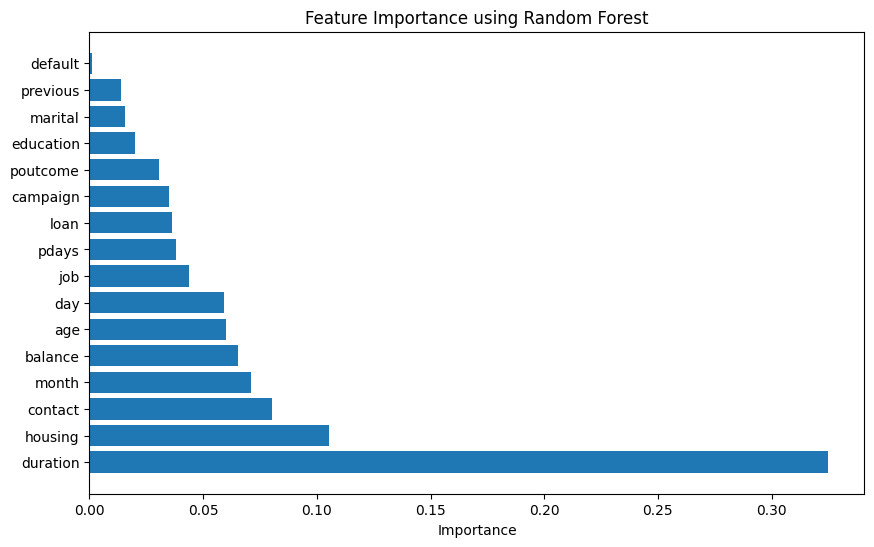

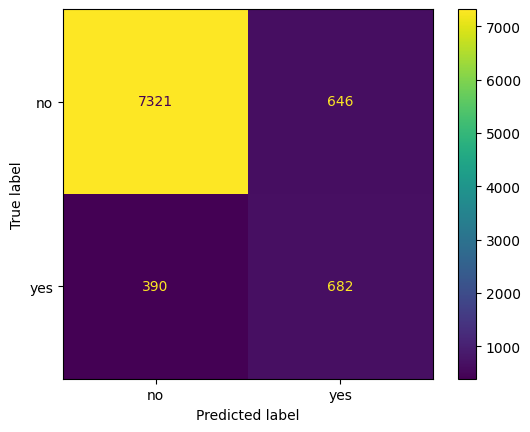

In [255]:
feature_importance = model_rf.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

features_sorted, importances_sorted = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(features_sorted)), importances_sorted, align='center')
plt.yticks(range(len(features_sorted)), features_sorted)
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

y_pred = model_rf.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = ["no", "yes",]).plot()
plt.show()

#### Gradient Boosting

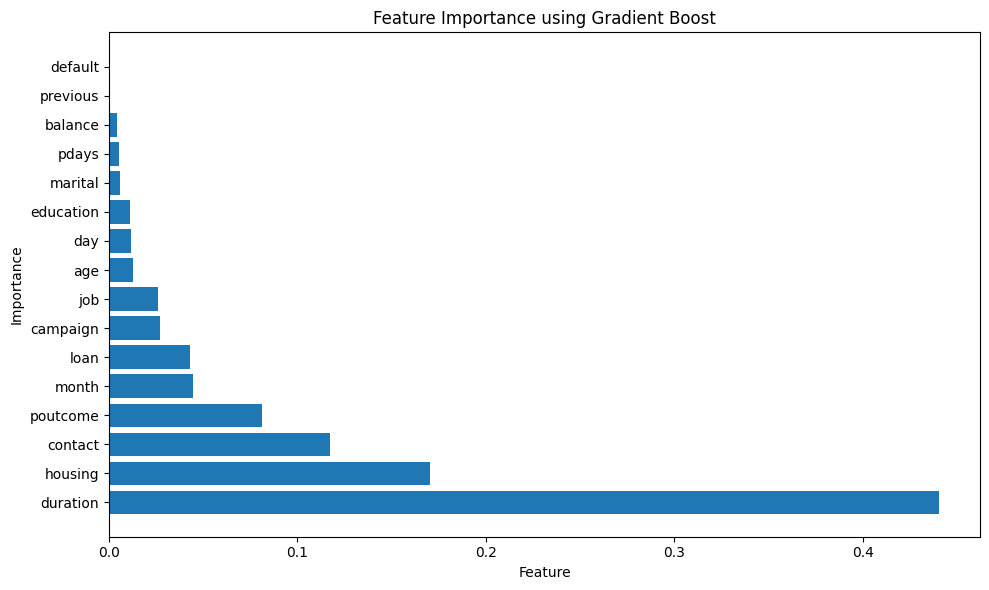

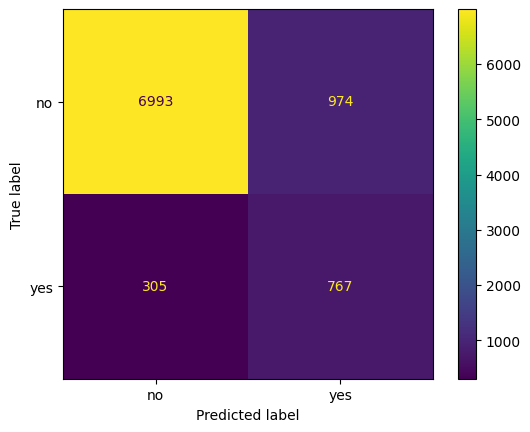

In [256]:
imp = model_gb.feature_importances_
features_names = model_gb.feature_names_in_
sorted_indices = np.argsort(imp)[::-1] 
sorted_imp = imp[sorted_indices]
sorted_features_names = [features_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features_names, sorted_imp)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance using Gradient Boost')
plt.tight_layout()
plt.show()

y_pred = model_gb.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = ["no", "yes",]).plot()
plt.show()

### Conclusions

- Comparing the results from all model algorithms and knowing that we have an unbalanced dataset with a low True Positives percentage, we must prioritize the **Recall**, **F1-Score** and **Precision** metrics over the **Accuracy** one, as any false negative/positive cases are really costly in our model analysis.

- Knowing all that, the ***Random Forest*** algorithm has the best results in terms of **Precision** and **F1-Score** and the ***Gradient Boost*** algorithm deals better with the positive cases in out dataset, as it gets the best **Recall** score.

- To conclude, we think ***Random Forest*** is the best algorithm to deal with our dataset, as it balances out the cost of false positive and falses negative cases, as shown with the best **F1-Score** overall. It is important to mention that the time difference to run this algorithms is a bit higher than ***K-Nearest Neighbor***, for example, but the results make up for that difference.
